# Task 1. Testing hypothesis of sample distribution type

## Imports

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Data

In [4]:
data = np.array([
    -71, -44, -58, -49, -53, -72, -59, -59, -62, -78, -62, -47, -46,
    -74, -62, -52, -45, -66, -48, -59, -44, -56, -58, -34, -55, -57,
    -51, -59, -58, -53, -67, -38, -90, -68, -36, -53, -35, -50, -74,
    -87, -50, -72, -50, -64, -51, -72, -52, -67, -58, -38, -79, -54,
    -37, -91, -62, -73, -62, -37, -61, -60, -64, -71, -64, -63,
    -72, -51, -47, -47, -49, -60, -74, -42, -45, -52, -67, -50,
    -64, -65, -58, -21, -67, -58, -36, -78, -63, -59, -59, -77,
    -77, -54, -69, -40, -41, -52, -79, -29, -59, -27, -59, -23,
    -63, -70, -58, -74, -67, -58, -65, -68, -59, -46, -58, -73,
    -58, -50, -72, -35, -57, -55, -68, -79, -58, -56, -62, -63,
    -39, -66, -70, -58, -60, -64, -54, -68, -69, -50, -30, -67,
    -71, -44, -84, -44, -71, -68, -86, -70, -44, -55, -41, -74,
    -48, -71, -65, -50, -46, -53, -49, -66, -69, -30, -59, -59,
    -39, -72, -65, -74, -79, -70, -48, -45, -69, -56, -54, -60,
])

## Solution

#### Variation series

In [5]:
variation_series = np.sort(data)
print(f"[+] Part of variation series: {variation_series[:10]}")

[+] Part of variation series: [-91 -90 -87 -86 -84 -79 -79 -79 -79 -78]


#### Interval statistical series

In [6]:
intervals_count = int(np.ceil(1 + 3.322 * np.log10(len(data))))
print(f"[+] Count of intervals: {intervals_count}")

[+] Count of intervals: 9


In [7]:
intervals = []
interval = []

for i in range(len(data)):
    if i and i % intervals_count == 0:
        intervals.append(interval[:])
        interval = []
    interval.append(data[i])

intervals = np.array(intervals)
print(f"[+] Shape of intervals: {intervals.shape}")

[+] Shape of intervals: (19, 9)


#### Relative frequencies visualization

In [9]:
values, counts = np.unique(data, return_counts=True)
relative_frequencies = counts / counts.sum()

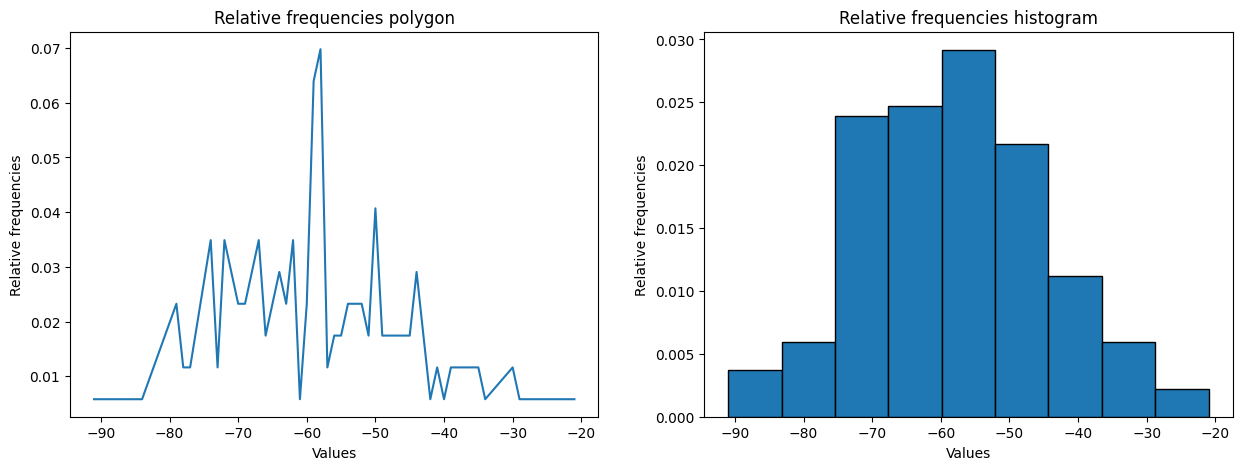

In [21]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.set_figheight(5)

axs[0].plot(values, relative_frequencies)
axs[0].set_title("Relative frequencies polygon")

axs[1].hist(data, bins=intervals_count, density=True, edgecolor="black")
axs[1].set_title("Relative frequencies histogram")

for ax in axs.flat:
    ax.set(xlabel="Values", ylabel="Relative frequencies")

#### Empirical distribution function

In [23]:
ecdf = np.arange(1, len(variation_series) + 1) / len(variation_series)

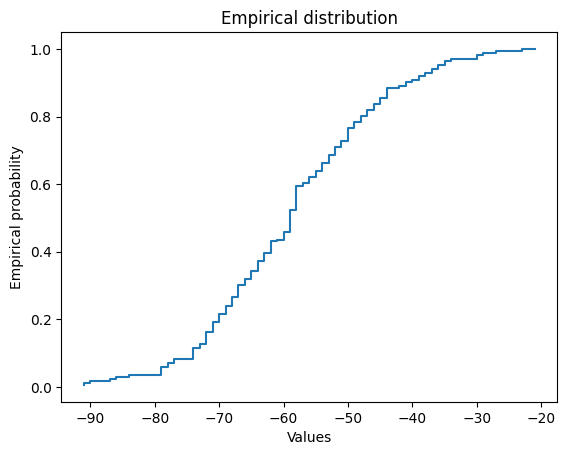

In [25]:
plt.step(variation_series, ecdf)
plt.title("Empirical distribution")
plt.xlabel("Values")
plt.ylabel("Empirical probability")
plt.show()

#### Data numerical characteristics

In [27]:
mean = np.mean(data)

In [26]:
variance = np.var(data, ddof=1) # ddof=1 for corrected sample variance

In [30]:
mode = stats.mode(data).mode

In [31]:
median = np.median(data)

In [32]:
kurtosis = stats.kurtosis(data)

In [33]:
skewness = stats.skew(data)

In [36]:
print(f"[+] Sample average: {mean:.4f}")
print(f"[+] Corrected sample variance: {variance:.4f}")
print(f"[+] Mode: {mode:.4f}")
print(f"[+] Median: {median:.4f}")
print(f"[+] Kurtosis: {kurtosis:.4f}")
print(f"[+] Skewness: {skewness:.4f}")

[+] Sample average: -58.2907
[+] Corrected sample variance: 177.9852
[+] Mode: -58.0000
[+] Median: -59.0000
[+] Kurtosis: -0.0316
[+] Skewness: 0.2517


#### Hypothesis about type of sample distribution

Distribution is normal

#### Assessment of general population parameters

In [37]:
mu_hat = mean
sigma_hat = np.sqrt(variance)

#### Theoretical analogs of functions visualization 

In [39]:
x = np.linspace(variation_series[0], variation_series[-1], len(variation_series))

In [40]:
# Theoretical density function
theoretical_pdf = stats.norm.pdf(x, loc=mu_hat, scale=sigma_hat)

In [41]:
# Theoretical distribution function
theoretical_cdf = stats.norm.cdf(x, loc=mu_hat, scale=sigma_hat)

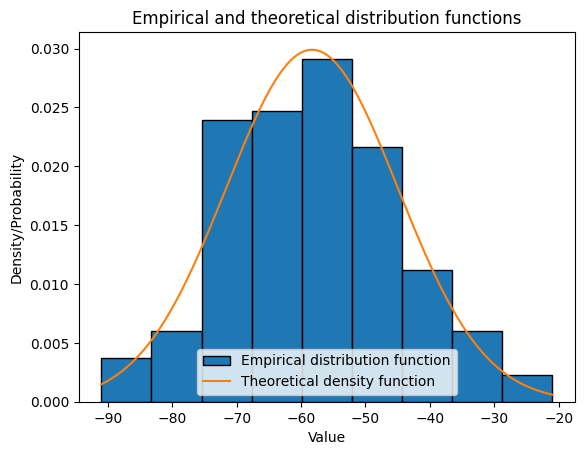

In [42]:
plt.hist(data, bins=intervals_count, density=True, edgecolor="black", label="Empirical distribution function")
plt.plot(x, theoretical_pdf, label="Theoretical density function")
# plt.plot(x, theoretical_cdf, label="Теоретическая функция распределения")
plt.title("Empirical and theoretical distribution functions")
plt.xlabel("Value")
plt.ylabel("Density/Probability")
plt.legend()
plt.show()

#### Three Sigma Rule

In [44]:
three_sigma_interval = [mu_hat - 3 * sigma_hat, mu_hat + 3 * sigma_hat]
print(f"\"Three sigma\" interval: [{three_sigma_interval[0]:.4f}, {three_sigma_interval[1]:.4f}]")

"Three sigma" interval: [-98.3140, -18.2674]


#### Pearson's criterion

In [74]:
counts, bins = np.histogram(data, bins=intervals_count)

In [75]:
relative_frequencies = counts / counts.sum()

In [79]:
expected_frequencies = expected_frequencies / expected_frequencies.sum() * counts.sum()

In [80]:
chi2_statistic, chi2_p_value = stats.chisquare(counts, expected_frequencies)

In [88]:
print(f"[+] Statistic: {chi2_statistic:.4f}")
print(f"[+] P-value: {chi2_p_value:.4f}")

[+] Statistic: 5.7050
[+] P-value: 0.6802


#### Kolmogorov's criterion

In [51]:
ks_statistic, ks_p_value = stats.kstest(data, "norm", args=(mu_hat, sigma_hat))

In [54]:
print(f"[+] Statistic: {ks_statistic:.4f}")
print(f"[+] P-value: {ks_p_value:.4f}")

[+] Statistic: 0.0785
[+] P-value: 0.2273


#### Confidence interval

In [47]:
confidence_level = 0.95
alpha = 1 - confidence_level
z_critical = stats.norm.ppf(1 - alpha / 2)
margin_of_error = z_critical * sigma_hat / np.sqrt(len(data))
confidence_interval = [mu_hat - margin_of_error, mu_hat + margin_of_error]

In [49]:
print(f"Confidence interval by confidence level {confidence_level * 100}%: [{confidence_interval[0]:.4f} {confidence_interval[1]:.4f}]")

Confidence interval by confidence level 95.0%: [-60.2845 -56.2969]
